In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO



In [4]:
q = '''
SELECT *
FROM bun_adp_engine.adp_ak_product_imp_count_temp
'''
imp = pd.read_sql(q, con=bun_rec)

In [5]:
q = '''
SELECT *
FROM bun_adp_engine.adp_ak_product_view_count_temp
'''
view = pd.read_sql(q, con=bun_rec)

In [7]:
df = pd.merge(imp, view, on=['keyword', 'content_id'])

In [9]:
ctr = df['view_count']/df['imp_count']
df['ctr'] = ctr

In [14]:
df['keyword'].unique().tolist()

['아디다스세트',
 '롱부츠',
 '전자저울',
 '토트넘',
 '빈티지 니트',
 '베니토 원피스',
 '버버리 패딩',
 '조이맥스',
 '퍼자켓',
 'cbr',
 '라코스테 후드티',
 '크루심',
 '스톤아일랜드',
 '아더에러',
 '여자친구',
 '아이폰xs',
 '부츠',
 '샤넬 카드지갑',
 '아이패드 8세대',
 'v30',
 '카드지갑',
 '오아이오아이 후드티',
 '나이키 경량패딩',
 '오마이걸',
 '체리퀴리',
 '3080',
 '나인옥토퍼스',
 '카시나',
 '스톤아일랜드 xxl',
 '보다나',
 '액상액상',
 '플라이모델',
 '픽시',
 '로에베',
 '할로윈',
 '위드아웃썸머 블라우스',
 '슈프림',
 '양털자켓',
 '버버리',
 '오토바이',
 '자전거',
 '스투시',
 '블랙핑크',
 '할리데이비슨',
 '마뗑킴',
 '낚시',
 '언더아머',
 '트와이스',
 '푸들',
 '디스이즈네버댓',
 '비비안웨스트우드 지갑',
 '아이패드 미니5',
 '태그호이어',
 '에어팟2 왼쪽',
 '어드레스',
 '노트10',
 '블랙박스',
 '프로미스나인',
 '백예린',
 '아이폰',
 '페이크퍼',
 '건담',
 '방탄',
 '버즈 라이브',
 '오클리',
 '보이져',
 '구관',
 '파타고니아 레트로x',
 '배달통',
 '디올카드지갑',
 '후드티',
 '카트라이더 계정',
 '샤넬 백',
 '애플워치5',
 '맥북',
 '데상트 패딩',
 '스투시 맨투맨',
 '조던 300',
 'rtx2060',
 '조던 285',
 '디스커버리 경량패딩',
 '모드나인',
 '데이식스',
 '게이밍컴퓨터',
 '베어브릭',
 '샤넬 선글라스',
 '데우스',
 '그래픽카드',
 '그레일즈',
 '버즈라이브',
 '바온',
 '개인렌트',
 '에어팟 프로 유닛',
 '숏패딩',
 '캠코더',
 '아미 후드티',
 '임블리 코트',
 '폴로 니트',
 '아이즈원',
 '아이폰11pro',
 '공기계',
 '우원재',
 

In [54]:
def draw(keyword):
    temp = df[df['keyword'] == keyword].sort_values('imp_count', ascending=False).reset_index()
    temp = temp.iloc[[i for i in range(len(temp)) if i%5==0], :].sort_values('imp_count', ascending=False).reset_index()
    plt.figure(figsize=(15,10))
    plt.plot(temp.index, temp['imp_count'], color = 'red', label='imp count')
    plt.plot(temp.index, temp['view_count'], color = 'blue', label='view count')
    plt.legend()

In [60]:
def get(keyword):
    temp = df[df['keyword'] == keyword].sort_values('imp_count', ascending=False).reset_index()
    temp = temp.iloc[[i for i in range(len(temp)) if i%5==0], :].sort_values('imp_count', ascending=False).reset_index()
    return temp

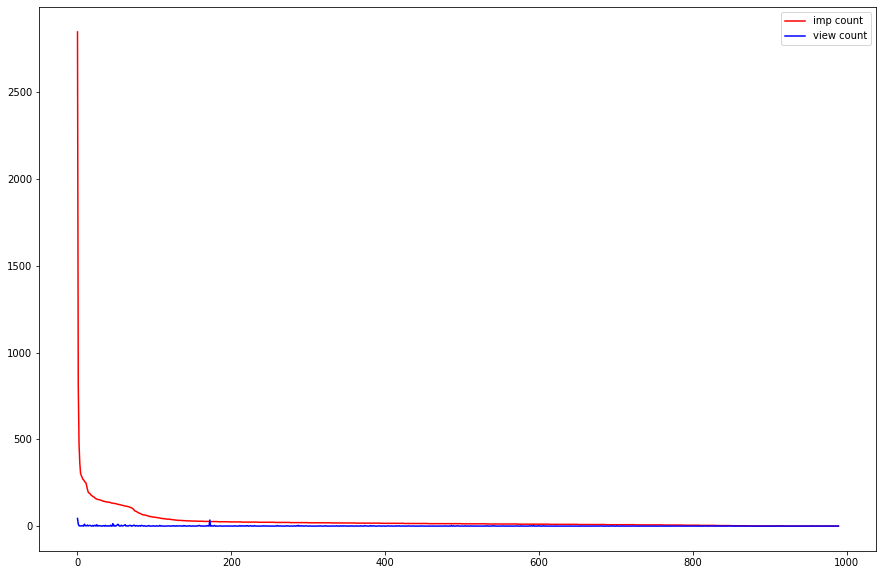

In [55]:
draw('나이키')

In [97]:
def get_rank(keyword):
    temp = df[df['keyword'] == keyword].sort_values('imp_count', ascending=False)
    if len(temp) > 100:
        temp = temp[:100]
    temp = temp.reset_index()
    total_imp = temp['imp_count'].sum()
    print('total imp:', total_imp)
    half = total_imp/2
    print('50% imp:', half)
    for i in range(len(temp)):
        plus = temp[:i]['imp_count'].sum()
        if plus >= half:
            return i

In [98]:
get_rank('나이키')

total imp: 34306
50% imp: 17153.0


25

In [99]:
get_rank('아이폰')

total imp: 63239
50% imp: 31619.5


10

In [100]:
get_rank('v30')

total imp: 5249
50% imp: 2624.5


32

In [101]:
get_rank('갤럭시')

total imp: 12242
50% imp: 6121.0


6

In [102]:
get_rank('헬로키티')

total imp: 3400
50% imp: 1700.0


40

In [76]:
nike = df[df['keyword'] == '나이키']
avg = []
for i in range(len(nike) - 4):
    window_avg = nike[i:i+5]['view_count'].sum()/nike[i:i+5]['imp_count'].sum()
    avg.append(window_avg)

In [77]:
avg

[0.016786570743405275,
 0.017141108050198958,
 0.02708803611738149,
 0.02745995423340961,
 0.03389830508474576,
 0.03482587064676617,
 0.12903225806451613,
 0.11267605633802817,
 0.09411764705882353,
 0.024072216649949848,
 0.01675977653631285,
 0.018276762402088774,
 0.018666666666666668,
 0.02020820575627679,
 0.0205761316872428,
 0.04950495049504951,
 0.04975124378109453,
 0.03651685393258427,
 0.03508771929824561,
 0.034934497816593885,
 0.024096385542168676,
 0.024539877300613498,
 0.023668639053254437,
 0.02434077079107505,
 0.024079320113314446,
 0.02710027100271003,
 0.024890190336749635,
 0.0256,
 0.025682182985553772,
 0.026570048309178744,
 0.02867383512544803,
 0.0374331550802139,
 0.0761904761904762,
 0.038135593220338986,
 0.027607361963190184,
 0.02480916030534351,
 0.025145067698259187,
 0.020161290322580645,
 0.02012072434607646,
 0.02531645569620253,
 0.03,
 0.03208556149732621,
 0.03365384615384615,
 0.049723756906077346,
 0.04639175257731959,
 0.04265402843601896,
 

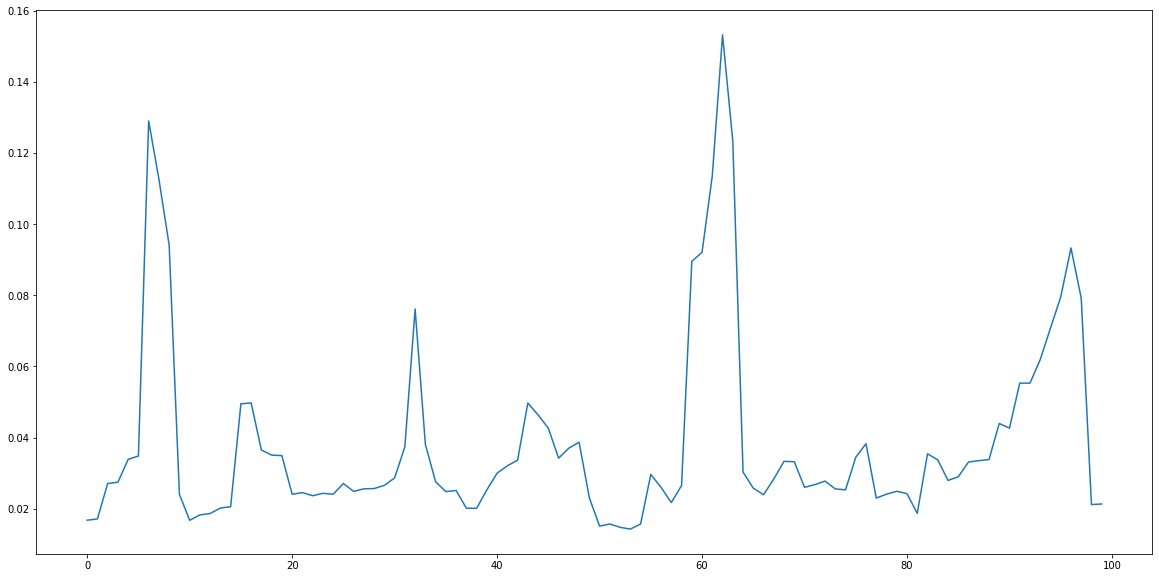

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(avg[:100])

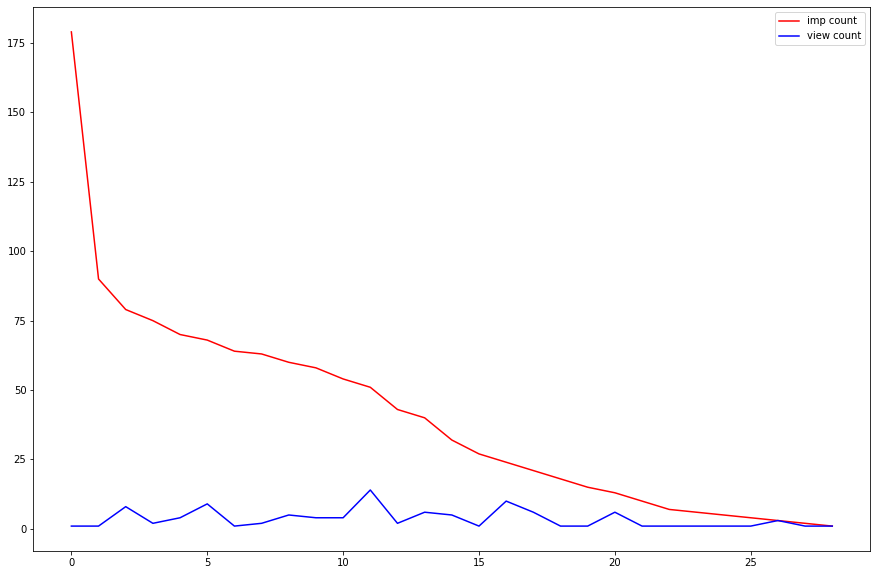

In [56]:
draw('v30')

In [62]:
get('v30')

,level_0,index,keyword,content_id,imp_count,view_count,ctr
0,0,477789,v30,136234270,179,1,0.005587
1,5,120925,v30,136097465,90,1,0.011111
2,10,221563,v30,136124272,79,8,0.101266
3,15,1033394,v30,136304355,75,2,0.026667
4,20,1043373,v30,136340316,70,4,0.057143
5,25,387776,v30,136192978,68,9,0.132353
6,30,510820,v30,133732943,64,1,0.015625
7,35,1043263,v30,136085408,63,2,0.031746
8,40,65551,v30,135966422,60,5,0.083333
9,45,640399,v30,136430148,58,4,0.068966


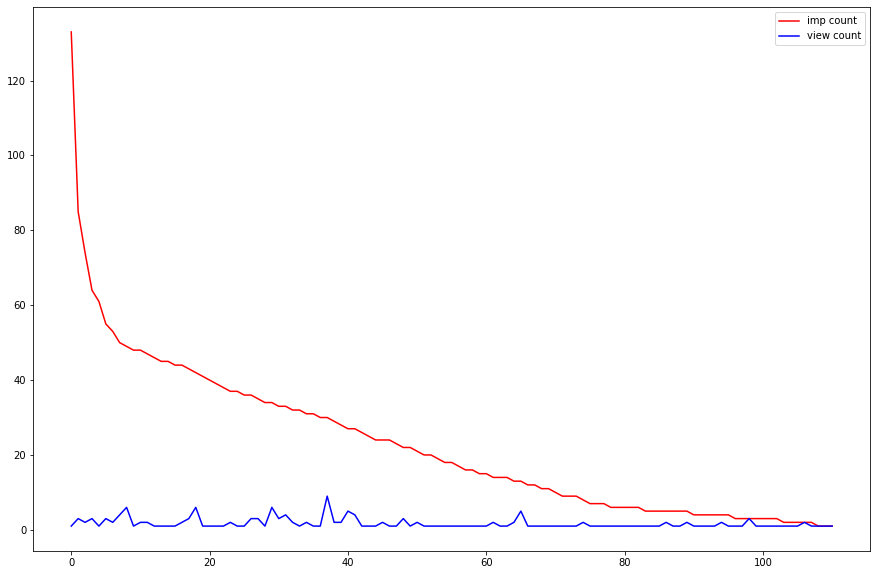

In [57]:
draw('빈티지 니트')

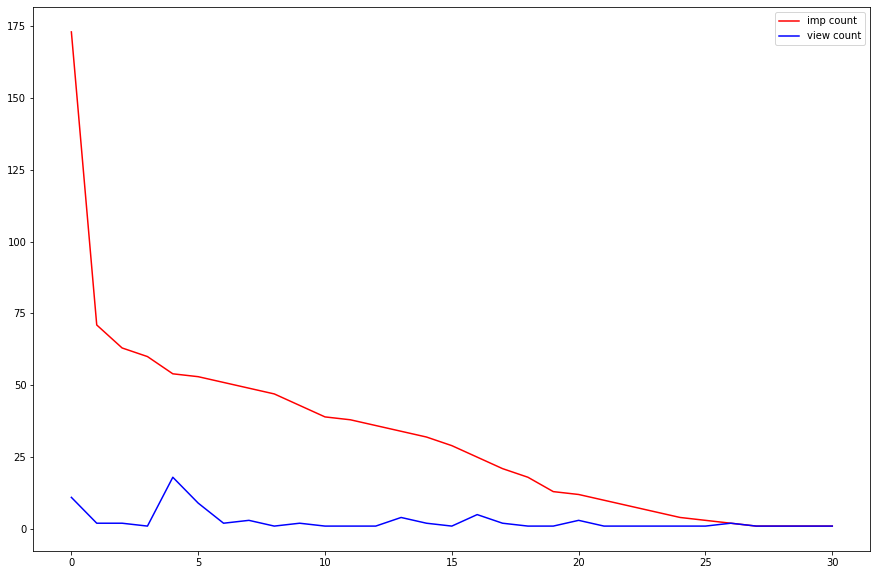

In [58]:
draw('보다나')